# 信用卡欺诈检测
- 基于信用卡交易记录数据建立分类模型来预测哪些数据是异常的哪些数据是正常的
# 任务流程：
- 加载数据，观察问题（大部分的数据都不是干净的，有缺失值，异常值，要经过处理）
- 针对问题给出解决方案
- 数据集切分
- 评估方法对比
- 逻辑回归模型
- 建模结果分析
- 方案效果对比

# 主要解决的问题：
 （1）在此项目中，我们首先对数据进行了解观察，发现其中不均衡的问题，其实我们做任务工作之前邹瑶先进行数据检查，看数据有什么问题，针对这些问题来选择解决方案。
 
 （2）这里我们提出了两种方法：下采样和过采样，两条路线对比试验，任何实际问题来了之后，我们都不会一条路走到黑，没有对比，就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到做合适的，所以在任务开始之前，要多一手准备。

# 做一个分类任务，：什么样的正常交易数据，什么样的非正常交易数据
- 多数属性列的数据都已经脱敏，Amount 属性列数据，没有脱敏，

In [4]:
# 导入工具包
# 导入数据处理和数据分析的包
import pandas as pd
# 导入科学计算，矩阵计算的包
import numpy as np
#导入可视化展示
import matplotlib.pyplot as plt


# 把图镶嵌到notebook中
%matplotlib inline

In [5]:
data = pd.read_csv('./data/csv/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

# 项目挑战与解决方案制定

# 数据标签分布

Text(0, 0.5, 'Frequency')

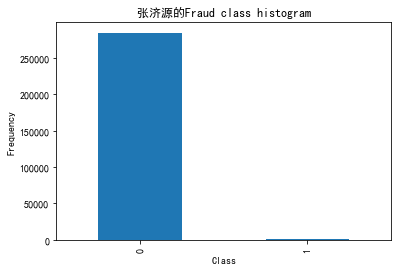

In [7]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = True

countes = pd.value_counts(data['Class'], sort = True)
count_classes = countes.sort_index()
bars = count_classes.plot(kind = 'bar')

plt.title('张济源的Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

# for b,c in zip(bars,countes):

#     # 将每一个数据都表示在坐标轴上
#     plt.text(b.get_width()+b.get_width()*0.05,b.get_y()+b.get_height()/10,
#              '{0}'.format(c))

# 数据标准化处理

In [8]:
#拿到数据之后先进行标准化处理，这部分数据只对其中的一部分属性列进行标准化处理

from sklearn.preprocessing import StandardScaler

# fit_transform: 计算平均值和方差，然后进行转换，
# .values.reshape(-1,1)： .values :(转换成ndarray的形式)； 
# .reshape(-1,1)：（fit_transform（）函数限定参数必须是二维的 ）
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# 利用drop() 函数删除不必要的属性列
data = data.drop(['Time','Amount'],axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# 下采样方案 ：减小数据量，使分类任务的数据量相差不多

In [9]:
# 对数据集进行划分，x：指除了标签之外的特征，y: 目标特征
x = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']

# 得到所有异常样本的索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)


# 输出异常样本的个数
print(number_records_fraud)

# 得到所有正常样本的索引
normal_indices = data[data.Class == 0].index

# 在正常样本中随机挑选出指定个数的样本，并取其索引:np.random.choice()
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace = False)
random_normal_indices = np.array(random_normal_indices)

# 有了正常和异常样本采样后，把他们的索引拿到,把两部分索引拼接在一起： np.concatenate（）
under_sample_data = np.concatenate([fraud_indices,random_normal_indices])

# 根据索引得到下采样的样本点
under_sample_data = data.iloc[under_sample_data,:]

x_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']


# 下采样 样本比例
print("正常样本所占的比例：",len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占的比例：",len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样策略总固体样本数量：",len(under_sample_data))

492
正常样本所占的比例： 0.5
异常样本所占的比例： 0.5
下采样策略总固体样本数量： 984


# 数据集划分

In [10]:
# cross_validation: 交叉验证模块
import sklearn as sns

# 目前train_test_split已被cross_validation被废弃了
# 改为从 sklearn.model_selection 中调用train_test_split 函数可以解决此问题。
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


# test_size: 测试集所占的比例
# random_state：随机种子，在同一个地方进行切分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

print("原始训练集包含样本数量：",len(x_train))
print("原始测试集包含样本数量：",len(x_test))
print('原始样本总数：',len(x_train)+len(x_test))

# 下采样数据集进行划分
x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample = \
train_test_split(x_undersample,y_undersample,test_size = 0.3,random_state = 0)

print("")
print("下采样训练集包含样本数量：",len(x_train_undersample))

print("下采样测试集包含样本数量：",len(x_test_undersample))

print("下采样样本总数：",len(x_train_undersample)+len(x_test_undersample))

原始训练集包含样本数量： 199364
原始测试集包含样本数量： 85443
原始样本总数： 284807

下采样训练集包含样本数量： 688
下采样测试集包含样本数量： 296
下采样样本总数： 984


# 模型评估方法与召回率

# 逻辑回归模型 

In [23]:
# Recall = TP/(TP+FN)
 # p : 关注什么什么就是positive，此时关注异常样本
    # TP: 就是异常样本被当做异常样本取出
    # FN: 就是正常样本被当做异常样本取出来了
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [60]:
def printing_Kfold_scores(x_train_data,y_train_data):
    # shuffle： 此时可以不洗牌，平均分成5份
    fold = KFold(5,shuffle = False,random_state=None)
    
    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2),
                                 columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # K-fold 表示K折的交叉验证，这里会得到两个索引集合：训练集 = indicex[0],验证集 = indices[1]
    j = 0
    # 循环遍历不同的参数
    for c_param in c_param_range:
        print("-----------------------------------------------")
        print("正则化惩罚力度：",c_param)
        print("_______________________________________________")
        print("")
        
        recall_accs = []
        
        # 分解进行交叉验证
        # iteration: 第几次交叉验证
        # indices：得到的索引标签
        
        # 出现错误：TypeError: 'KFold' object is not iterable
        # 修改为： fold.split(x_train_data)
        for iteration,indices in enumerate(fold.split(x_train_data),start=1):
            
            # 指定算法模型，并且给定参数
            lr = LogisticRegression(C = c_param,penalty = 'l1')
            
            # 调节模型，注意索引，训练集一定要传入训练集，x,y 的索引都是0
            # 训练模型   .fit()
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            # 建立好模型后，预测模型结果，用验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            # 有预测结果，就可以评估了，用recall_score () ，需要传入预测值和真实值
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            
            # 之后算平均，所以保存每一步的结果
            recall_accs.append(recall_acc)
            print("Iteration",iteration,'召回率 = ',recall_acc)
            
            
        results_table.loc[j,"Mean recall score"] = np.mean(recall_accs)   
        j +=1
        print("")
        print("平均召回率",np.mean(recall_accs))
        print("")
        
        
    # 找到最好的参数，哪一个Recall 值高，就是模型较好
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    # 打印出最好的结果
    print('************************************************88')
    print("效果最好的模型所选的参数 = ",best_c)        
    print('************************************************88')
        
    return best_c

# 交叉验证与不同参数结果

In [61]:
# 传进来下采样中的训练集，
best_c = printing_Kfold_scores(x_train_undersample,y_train_undersample)

-----------------------------------------------
正则化惩罚力度： 0.01
_______________________________________________

Iteration 1 召回率 =  0.9315068493150684
Iteration 2 召回率 =  0.9315068493150684
Iteration 3 召回率 =  0.9830508474576272
Iteration 4 召回率 =  0.972972972972973
Iteration 5 召回率 =  0.9393939393939394

平均召回率 0.9516862916909353

-----------------------------------------------
正则化惩罚力度： 0.1
_______________________________________________

Iteration 1 召回率 =  0.8493150684931506
Iteration 2 召回率 =  0.863013698630137
Iteration 3 召回率 =  0.9322033898305084
Iteration 4 召回率 =  0.9459459459459459
Iteration 5 召回率 =  0.8939393939393939

平均召回率 0.8968834993678272

-----------------------------------------------
正则化惩罚力度： 1
_______________________________________________

Iteration 1 召回率 =  0.863013698630137
Iteration 2 召回率 =  0.8904109589041096
Iteration 3 召回率 =  0.9830508474576272
Iteration 4 召回率 =  0.9459459459459459
Iteration 5 召回率 =  0.9090909090909091

平均召回率 0.9183024720057457

-----------------------

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklea

Iteration 3 召回率 =  0.9830508474576272
Iteration 4 召回率 =  0.9459459459459459
Iteration 5 召回率 =  0.9090909090909091

平均召回率 0.9183024720057457

************************************************88
效果最好的模型所选的参数 =  0.01
************************************************88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 混淆矩阵评估分析 模板用的时候直接复制

In [77]:
# classes: 用的时候一般改的就是类别，该任务是二类别的
def plot_confusion_matrix(cm,classes,title = "Confusion matrix",cmap = plt.cm.Blues):
    #绘制混淆矩阵
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = "red" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    

# 混淆矩阵画图

召回率： 0.9319727891156463


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


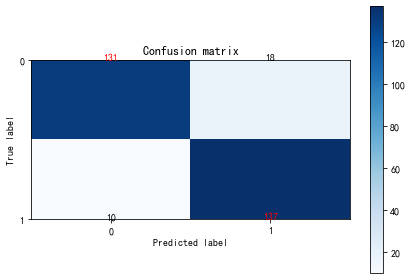

In [78]:
import itertools

# 拿出最好的参数：best_c
lr = LogisticRegression(C = best_c,penalty = 'l1')
# 用最好的参数训练模型
lr.fit(x_train_undersample,y_train_undersample.values.ravel())
# 预测结果，在测试集上
# 直接用predict() 函数：默认阈值为0.5
y_pred_undersample = lr.predict(x_test_undersample.values)

# 计算所需值
# confusion_matrix（） :混淆矩阵，传进来测试值，预测值
# 并不是全部的测试集数据
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
# 精确到多少位
np.set_printoptions(precision = 2)

print("召回率：",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names,title = "Confusion matrix")

plt.show()

# 我们关注的是异常值；即为真实值为1的，预测正确的概率，即为召回率

# 下采样方案在原始数据中的结果

召回率： 0.9183673469387755


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


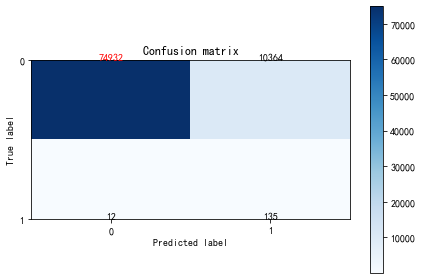

In [79]:
# 拿出最好的参数：best_c
lr = LogisticRegression(C = best_c,penalty = 'l1')
# 用最好的参数训练模型
lr.fit(x_train_undersample,y_train_undersample.values.ravel())
# 预测结果，在原始测试集上
y_pred = lr.predict(x_test.values)

# 计算所需值
# confusion_matrix（） :混淆矩阵，传进来测试值，预测值
# 并不是全部的测试集数据
cnf_matrix = confusion_matrix(y_test,y_pred)
# 精确到多少位
np.set_printoptions(precision = 2)

print("召回率：",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names,title = "Confusion matrix")

plt.show()


# 真实数据集上召回率还可以，但是正常的样本预测为异常样本的数量太多了，10364 个！！！！！误杀率太多了，不行，换方案！！ 过采样方案

In [80]:
best_c = printing_Kfold_scores(x_train,y_train)

-----------------------------------------------
正则化惩罚力度： 0.01
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.4925373134328358


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.6027397260273972


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.6833333333333333


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.5692307692307692


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.45

平均召回率 0.5595682284048672

-----------------------------------------------
正则化惩罚力度： 0.1
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.5671641791044776


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.6164383561643836


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.6833333333333333


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.5846153846153846


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.525

平均召回率 0.5953102506435158

-----------------------------------------------
正则化惩罚力度： 1
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.5522388059701493


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.6164383561643836


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.7166666666666667


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.6153846153846154


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.5625

平均召回率 0.612645688837163

-----------------------------------------------
正则化惩罚力度： 10
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.5522388059701493


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.6164383561643836


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.7333333333333333


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.6153846153846154


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.575

平均召回率 0.6184790221704963

-----------------------------------------------
正则化惩罚力度： 100
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.5522388059701493


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.6164383561643836


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.7333333333333333


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.6153846153846154


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.575

平均召回率 0.6184790221704963

************************************************88
效果最好的模型所选的参数 =  10.0
************************************************88


# 阈值对结果的影响

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


给定阈值为： 0.1 时测试集召回率： 1.0
给定阈值为： 0.2 时测试集召回率： 1.0
给定阈值为： 0.3 时测试集召回率： 1.0
给定阈值为： 0.4 时测试集召回率： 0.9659863945578231
给定阈值为： 0.5 时测试集召回率： 0.9319727891156463
给定阈值为： 0.6 时测试集召回率： 0.8707482993197279
给定阈值为： 0.7 时测试集召回率： 0.8163265306122449
给定阈值为： 0.8 时测试集召回率： 0.782312925170068
给定阈值为： 0.9 时测试集召回率： 0.6054421768707483


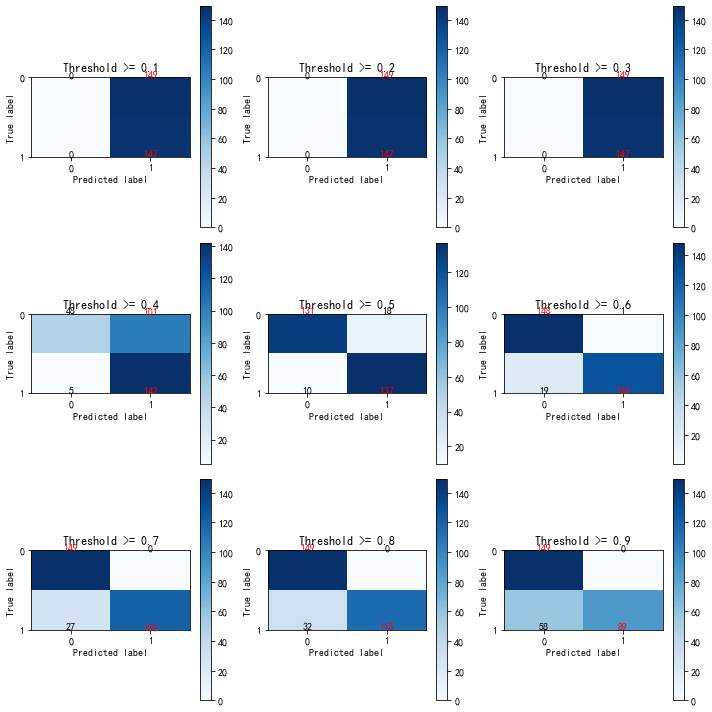

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

# 用之前最好的参数来进行建模
lr = LogisticRegression(C = 0.01,penalty = 'l1')

# 训练模型，还是用下采样的数据集
lr.fit(x_train_undersample,y_train_undersample.values.ravel())

# 得到预测结果的概率值: predict_proba() 可以随意指定阈值
y_pred_undersample_proba = lr.predict_proba(x_test_undersample.values)

# 指定不同的阈值
# 此处，选出了所有的阈值，真实处理的时候，要尽可能的选择偏中间的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (10,10))

j = 1

# 用混淆矩阵来表示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    # 画三行三列的图：（有9个参数，j 表示第几个图的意思）
    plt.subplot(3,3,j)
    j +=1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision = 2)
    
    print("给定阈值为：",i,"时测试集召回率：",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,classes = class_names,title = "Threshold >= %s"%i)

# Smote 过采样方案

In [84]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [91]:
credit_cards = pd.read_csv('./data/csv/creditcard.csv')

columns = credit_cards.columns
# 在特征中除掉标签
features_columns = columns.delete(len(columns)-1)

features = credit_cards[features_columns]
labels = credit_cards['Class']
credit_cards.head()
print(labels)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [98]:
# 对数据集进行切分:train_test_split
# test_size: 测试集所占的总数据的比例
features_train,features_test,labels_train,labels_test = train_test_split(features,
                                                                        labels,
                                                                        test_size = 0.3,
                                                                        random_state = 0)



#基于SMOTE算法来进行样本生成，这样正例和负例样本数量就是一致的了

In [99]:
# random_state: 每次随机的结果都是一样的，随机切分
oversampler = SMOTE(random_state = 0)
os_features,os_labels = oversampler.fit_sample(features_train,labels_train)

训练样本数量

In [100]:
len(os_labels[os_labels == 1])

199019

In [101]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-----------------------------------------------
正则化惩罚力度： 0.01
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.9142857142857143


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.9717248356095094


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.9620761993292047


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.9617244714660771

平均召回率 0.9379622441381011

-----------------------------------------------
正则化惩罚力度： 0.1
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.9142857142857143


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.9728882144663632


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.961963143944628


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.9639353323200222

平均召回率 0.9386144810033455

-----------------------------------------------
正则化惩罚力度： 1
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.9142857142857143


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.9730905412240769


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.9636212895850867


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.9645006092429058

平均召回率 0.9390996308675568

-----------------------------------------------
正则化惩罚力度： 10
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.9142857142857143


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.9730399595346485


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.9644252389865213


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.9634705490723178

平均召回率 0.9390442923758403

-----------------------------------------------
正则化惩罚力度： 100
_______________________________________________



d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 召回率 =  0.9142857142857143


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 召回率 =  0.88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 召回率 =  0.973343449671219


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 召回率 =  0.9641865665079704


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 召回率 =  0.9645006092429058

平均召回率 0.939263267941562

************************************************88
效果最好的模型所选的参数 =  100.0
************************************************88


d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


召回率： 0.8843537414965986


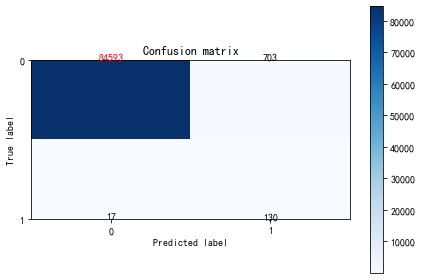

In [103]:
# 拿出最好的参数：best_c
lr = LogisticRegression(C = best_c,penalty = 'l1')
# 用最好的参数训练模型
lr.fit(os_features,os_labels.values.ravel())
# 预测结果，在原始测试集上
y_pred = lr.predict(features_test.values)

# 计算所需值
# confusion_matrix（） :混淆矩阵，传进来测试值，预测值
# 并不是全部的测试集数据
cnf_matrix = confusion_matrix(labels_test,y_pred)
# 精确到多少位
np.set_printoptions(precision = 2)

print("召回率：",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names,title = "Confusion matrix")

plt.show()


# 项目总结
- 观察数据，查看问题，选择解决方案
- 方案：下采样和过采样，根据具体问题对比实验结果，对各种方法进行对比
- ！！！对数据进行预处理，eig.数据标准化，缺失值，标注。。
- 先选择评估方法，在建模，评估指标Recall,准确率等，也可以自己指定